In [5]:
import pandas as pd
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)
import matplotlib.pyplot as plt

In [2]:
datadict = pd.read_csv('../data/raw/WiDS Datathon 2020 Dictionary.csv')

In [3]:
train = pd.read_csv('../data/raw/training_v2.csv')

In [33]:
datadict.head()

,Category,Variable Name,Unit of Measure,Data Type,Description,Example
0,identifier,encounter_id,None,integer,Unique identifier associated with a patient un...,None
1,identifier,hospital_id,None,integer,Unique identifier associated with a hospital,None
2,identifier,patient_id,None,integer,Unique identifier associated with a patient,None
3,demographic,hospital_death,None,binary,Whether the patient died during this hospitali...,0
4,demographic,age,Years,numeric,The age of the patient on unit admission,None


In [4]:
datadict['Unit of Measure'].unique()

array(['None', 'Years', 'kilograms/metres^2', 'centimetres', 'Days',
       'kilograms', 'g/L', 'micromol/L', 'mmol/L', 'Fraction',
       'Beats per minute', 'Millimetres of mercury', 'Breaths per minute',
       'Degrees Celsius', 'Millilitres', '10^9/L', 'Percentage', 'g/dL'],
      dtype=object)

In [5]:
datadict['Data Type'].unique()

array(['integer', 'binary', 'numeric', 'string'], dtype=object)

In [6]:
# check if columns are same

In [8]:
train_cols = set(train.columns)
datadict_cols = set(datadict['Variable Name'].unique())

len(train_cols), len(datadict_cols), len(train_cols.intersection(datadict_cols))

(186, 188, 186)

In [31]:
datadict_cols.difference(train_cols)

{'icu_admit_type', 'pred'}

In [10]:
# they're congruent, leverage dict defs to build out typecast column lists

In [36]:
continuous_cols = list(
    list(datadict[datadict['Data Type'] == 'integer']['Variable Name'].unique())
    + list(datadict[datadict['Data Type'] == 'numeric']['Variable Name'].unique())
)
categorical_cols = list(datadict[datadict['Data Type'] == 'string']['Variable Name'].unique())
binary_cols = list(datadict[datadict['Data Type'] == 'binary']['Variable Name'].unique())
target_cols = 'hospital_death'

#continuous_cols.remove(target_cols)

In [37]:
target_cols

'hospital_death'

In [38]:
continuous_cols

['encounter_id',
 'hospital_id',
 'patient_id',
 'icu_id',
 'gcs_eyes_apache',
 'gcs_motor_apache',
 'gcs_verbal_apache',
 'age',
 'height',
 'pre_icu_los_days',
 'weight',
 'albumin_apache',
 'bilirubin_apache',
 'bun_apache',
 'creatinine_apache',
 'fio2_apache',
 'glucose_apache',
 'heart_rate_apache',
 'hematocrit_apache',
 'map_apache',
 'paco2_apache',
 'paco2_for_ph_apache',
 'pao2_apache',
 'ph_apache',
 'resprate_apache',
 'sodium_apache',
 'temp_apache',
 'urineoutput_apache',
 'wbc_apache',
 'd1_diasbp_invasive_max',
 'd1_diasbp_invasive_min',
 'd1_diasbp_max',
 'd1_diasbp_min',
 'd1_diasbp_noninvasive_max',
 'd1_diasbp_noninvasive_min',
 'd1_heartrate_max',
 'd1_heartrate_min',
 'd1_mbp_invasive_max',
 'd1_mbp_invasive_min',
 'd1_mbp_max',
 'd1_mbp_min',
 'd1_mbp_noninvasive_max',
 'd1_mbp_noninvasive_min',
 'd1_resprate_max',
 'd1_resprate_min',
 'd1_spo2_max',
 'd1_spo2_min',
 'd1_sysbp_invasive_max',
 'd1_sysbp_invasive_min',
 'd1_sysbp_max',
 'd1_sysbp_min',
 'd1_sysbp_

In [24]:
categorical_cols

['bmi',
 'ethnicity',
 'gender',
 'hospital_admit_source',
 'icu_admit_source',
 'icu_admit_type',
 'icu_stay_type',
 'icu_type',
 'apache_2_diagnosis',
 'apache_3j_diagnosis',
 'apache_3j_bodysystem',
 'apache_2_bodysystem']

In [25]:
binary_cols

['hospital_death',
 'elective_surgery',
 'readmission_status',
 'apache_post_operative',
 'arf_apache',
 'gcs_unable_apache',
 'intubated_apache',
 'ventilated_apache',
 'aids',
 'cirrhosis',
 'diabetes_mellitus',
 'hepatic_failure',
 'immunosuppression',
 'leukemia',
 'lymphoma',
 'solid_tumor_with_metastasis']

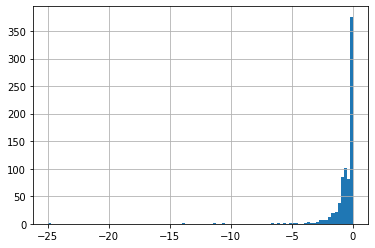

In [10]:
train[0 > train['pre_icu_los_days']]['pre_icu_los_days'].hist(bins=100)
plt.show()

In [12]:
[x for x in train.columns if 'apache_4' in x]

['apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob']

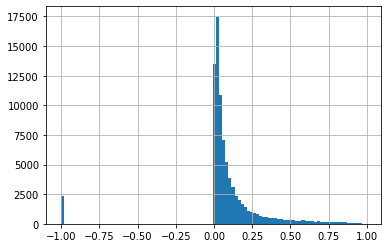

In [13]:
train['apache_4a_hospital_death_prob'].hist(bins=100)
plt.show()

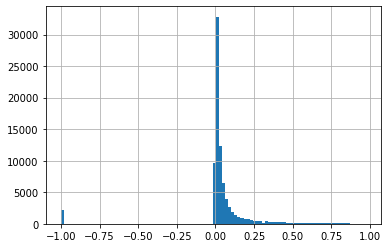

In [15]:
train['apache_4a_icu_death_prob'].hist(bins=100)
plt.show()